<a href="https://colab.research.google.com/github/mch60131242/Home/blob/main/%EC%A3%BC%EC%84%B1%EB%B6%84_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
fruits = np.load('/content/fruits_300.npy') # 100*100의 10000차원
fruits_2d = fruits.reshape(-1,100*100) # (샘플개수, 너비x높이 의 2차원 으로 변경)

--2023-03-14 05:18:11--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-03-14 05:18:11--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-03-14 05:18:12--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [8]:
from sklearn.decomposition import PCA
pca =PCA(n_components=50) ## 주성분의 개수 50개 
pca.fit(fruits_2d)

PCA(n_components=50)

In [10]:
print(pca.components_.shape)



(50, 10000)


In [13]:
import matplotlib.pyplot as plt
def draw_fruits(arr,ratio=1):
  n = len(arr)

  rows = int(np.ceil(n/10))
  cols = n if rows<2 else 10
  fig,axs = plt.subplots(rows,cols, figsize=(cols*ratio, rows*ratio), squeeze =False)
  for i in range(rows):
    for j in range(cols):
      if i*10 +j <n:
        axs[i,j].imshow(arr[i*10+j], cmap='gray_r')
      axs[i,j].axis('off')
  plt.show()

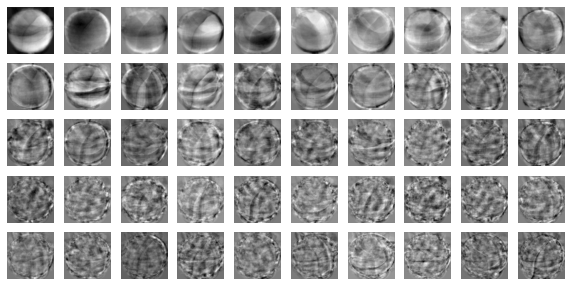

In [14]:
draw_fruits(pca.components_.reshape(-1,100,100))

In [16]:
fruits_pca =pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


In [19]:
fruits_inverse= pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)


(300, 10000)


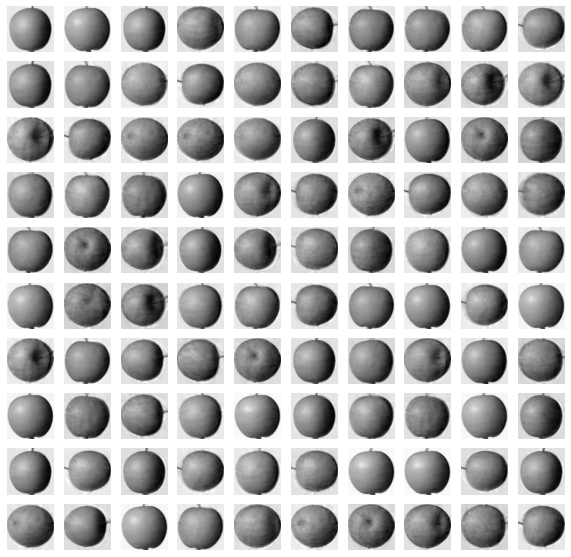

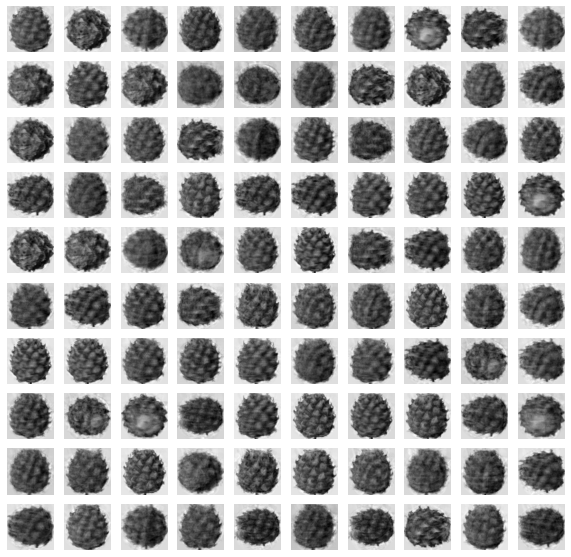

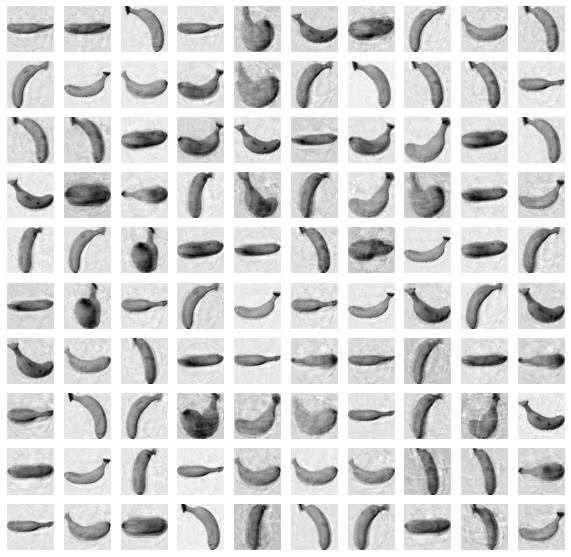

In [22]:
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print('\n')

0.9215092140342797


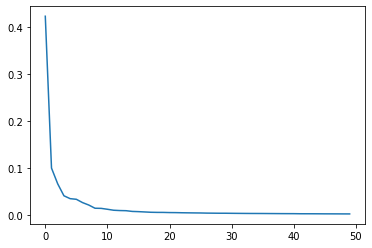

In [23]:
print(np.sum(pca.explained_variance_ratio_))

plt.plot(pca.explained_variance_ratio_)

[0.42357017 0.09941755 0.06577863 0.04031172 0.03416875 0.03281329
 0.02573267 0.02054963 0.01372276 0.01342773 0.01152146 0.00944596
 0.00878232 0.00846697 0.00693049 0.00645188 0.00578896 0.00511202
 0.00486383 0.00480347 0.0044783  0.00437318 0.00408033 0.00389476
 0.00372415 0.00359254 0.00331456 0.00317842 0.00304288 0.00303756
 0.00288794 0.00275846 0.00264945 0.00255881 0.00251951 0.00247329
 0.00238481 0.00230992 0.00221538 0.00216795 0.00213862 0.00195894
 0.00192513 0.00191207 0.00185472 0.00176898 0.00173584 0.0016919
 0.00162397 0.00159657]


In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
target = np.array([0]*100+[1]*100+[2]*100)


In [30]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr,fruits_2d,target)
scores1 = cross_validate(lr,fruits_pca,target)
print(np.mean(scores['test_score']))  ## cross_validate 가 기본적으로 5fold이므로 평균으로 보는것.
print(np.mean(scores1['test_score']))

0.9966666666666667
1.0


In [31]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [32]:
print(pca.n_components_)



2


In [33]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [36]:
scores = cross_validate(lr, fruits_pca,target)
print(np.mean(scores['test_score']))

0.9933333333333334


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [39]:
from sklearn.cluster import KMeans
km =KMeans(n_clusters=3, random_state=19)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([0, 1, 2], dtype=int32), array([ 91,  99, 110]))


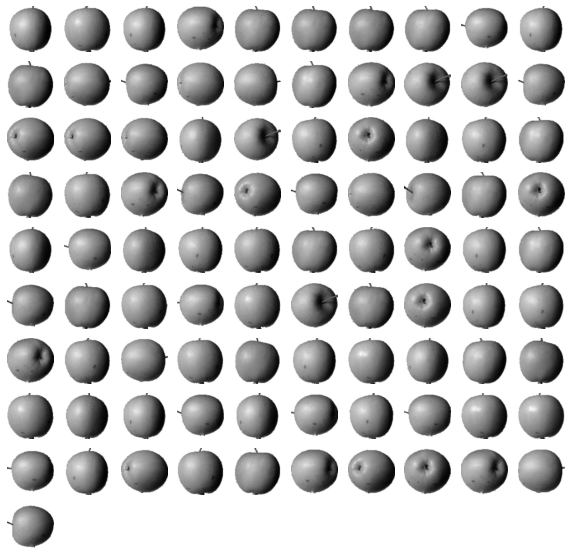

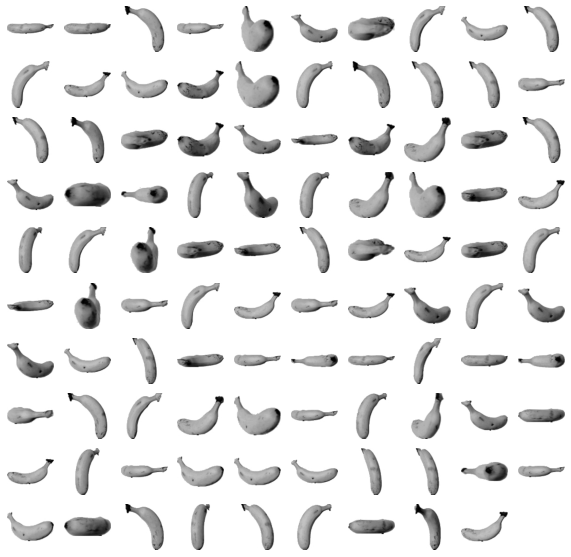

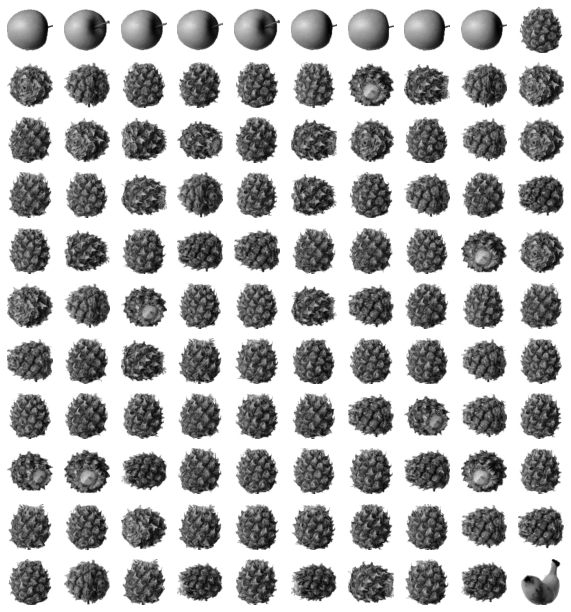

In [41]:
for label in range(0,3):
  draw_fruits(fruits[km.labels_==label])
  print('\n')

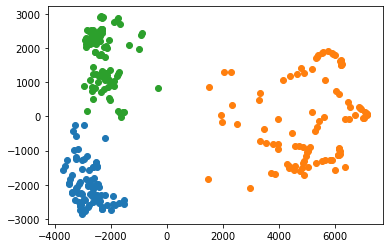

In [42]:
for label in range(0,3):
  data = fruits_pca[km.labels_==label]
  plt.scatter(data[:,0], data[:,1])
